<a href="https://colab.research.google.com/github/im-vne/Snakes-or-No-Snakes/blob/main/DataExploration_06_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### To gain authorization to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import os # work with system
import cv2 # work with images
import numpy as np # arrays and numerical analysis
import matplotlib.pyplot as plt # for data plots
from PIL import Image # extract image information
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split # data splitting
from sklearn import metrics # model evaluation
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import random # for random sampling
import pathlib
from datetime import datetime
import time
import platform
import pandas as pd
import seaborn as sns

In [4]:
# check current wd
os.getcwd()
# set working directory in data folder
os.chdir("drive/Shareddrives/Capstone 2023/Data/MicrosoftSnakeAlgorithmProject")

In [5]:
# import the necessary packages
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist, lbp

In [6]:
counter = 0 # if desired to break loop
# labels and filenames should match since they are appended in order

filenames = []
labels = []
# walk through all directories and files in current working directory
for root, dir, files in os.walk(os.getcwd()):

    for jpg in files:
        # if jpg file, then keep filename
        if ".JPG" in jpg:
            filenames.append(os.path.join(root, jpg))
            # for image files, create label based on path: 0 means empty, 1 means snake
            if "Empty" in root:
                labels.append(0)
            else:
                labels.append(1)

    counter += 1
    # if counter > 100: break

# save path for faulty image
faulty_image = '/content/drive/Shareddrives/Capstone 2023/Data/MicrosoftSnakeAlgorithmProject/Snake_Images/FL_Snakes/WF8/IMG_7087.JPG'


# check lengths of vectors
#print(len(labels))
#print(len(filenames))

# delete faulty index and its corresponding label
if faulty_image in filenames:
  index = filenames.index(faulty_image)
  print(index)
  print(filenames[index])
  print(labels[index])
  del filenames[index]
  del labels[index]

# check and make sure only one as deleted
print(len(filenames))
print(len(labels))

# initialize image path
images = []
counter2 = 0

# initialize timestamp
timestamps = []
# gray scale (each is a 2d array)
#for img in filenames:
#    images.append(cv2.imread(img, cv2.IMREAD_GRAYSCALE))
#    counter2 += 1
    # if counter2 > 100: break

23021
/content/drive/Shareddrives/Capstone 2023/Data/MicrosoftSnakeAlgorithmProject/Snake_Images/FL_Snakes/WF8/IMG_7087.JPG
1
23275
23275


In [8]:
#if you ran this once, make sure to make the timestamp vector empty or else it will keep adding past 23000 ish

#this take an hour and 25 minutes to run

timestamps = []

# takes timestamp from every image file (23275)
for img in filenames:
  image = Image.open(img)
  exif = image.getexif() # get meta data
  time = exif[306] # 306 is for the specific index for original image time
  timestamps.append(time) # save the times into a vector


In [9]:
# to check length and number of vectors
print(timestamps[1])
print(timestamps[2000])
print(labels[1])
print(labels[2000])
print(len(labels))
print(len(timestamps))

2018:05:20 15:23:00
2018:07:29 15:59:00
0
0
23275
23275


In [29]:
# Get camera and location
camera = []
location = []
locations = []
#test = filenames[]
print(filenames[1])
#test1 = test.split("/")
for i in filenames:
  completepath = i.split("/")
  camera.append(completepath[9])
  location.append(completepath[8])

print("camera information check")
print(len(camera))

for i in location:
  locationpath = i.split("_")
  locations.append(locationpath[0])


print("location information check")
print(locations[0:10])
print(len(locations))

#convert to date time in python


dates = []

date_format = '%Y:%m:%d %H:%M:%S'
for i in timestamps:
  date_obj = datetime.strptime(i, date_format)
  dates.append(date_obj)

print(dates[13000])
print(type(dates[13000]))


/content/drive/Shareddrives/Capstone 2023/Data/MicrosoftSnakeAlgorithmProject/Empty_Images/FL_empty/FF1/IMG_0151.JPG
camera information check
23275
location information check
['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL']
23275
2016-09-08 16:25:00
<class 'datetime.datetime'>


In [16]:
df_file_names = pd.DataFrame({'Snake':labels, 'Date':dates, 'location':locations, 'camera':camera, 'Path' : filenames})
print(df_file_names.head(3))
print(df_file_names.tail(3))


df_file_names.sort_values(by='Date', inplace = True)
print(df_file_names.head(5))

print("Group by code")
df_file_names['cumsum_snakes'] = df_file_names.groupby('location')['Snake'].cumsum()
print(df_file_names.head(5))

print("total snakes")
df_file_names['cumsum_snakes_total'] = df_file_names.Snake.cumsum()
print(df_file_names.head(5))
print(df_file_names.tail(5))

   Snake                Date location camera  \
0      0 2018-05-20 15:22:00       FL    FF1   
1      0 2018-05-20 15:23:00       FL    FF1   
2      0 2018-05-20 15:24:00       FL    FF1   

                                                Path  
0  /content/drive/Shareddrives/Capstone 2023/Data...  
1  /content/drive/Shareddrives/Capstone 2023/Data...  
2  /content/drive/Shareddrives/Capstone 2023/Data...  
       Snake                Date location camera  \
23272      1 2018-10-26 14:02:00       FL    WI3   
23273      1 2018-10-26 14:03:00       FL    WI3   
23274      1 2018-10-26 14:04:00       FL    WI3   

                                                    Path  
23272  /content/drive/Shareddrives/Capstone 2023/Data...  
23273  /content/drive/Shareddrives/Capstone 2023/Data...  
23274  /content/drive/Shareddrives/Capstone 2023/Data...  
       Snake                Date location camera  \
20930      1 2016-03-08 07:36:30      LPS   TSP1   
20931      1 2016-03-08 07:37:00      

In [13]:
# create basic pandas dataframe
df = pd.DataFrame({'Snake':labels, 'Date':dates, 'location':locations, 'camera':camera})
print(df.head(10))
print(df.tail(10))

   Snake                Date location camera
0      0 2018-05-20 15:22:00       FL    FF1
1      0 2018-05-20 15:23:00       FL    FF1
2      0 2018-05-20 15:24:00       FL    FF1
3      0 2018-05-20 15:25:00       FL    FF1
4      0 2018-05-20 15:26:00       FL    FF1
5      0 2018-05-20 15:27:00       FL    FF1
6      0 2018-05-20 15:28:00       FL    FF1
7      0 2018-05-20 15:29:00       FL    FF1
8      0 2018-05-20 15:30:00       FL    FF1
9      0 2018-05-20 15:31:00       FL    FF1
       Snake                Date location camera
23265      1 2018-09-04 10:18:00       FL    WF9
23266      1 2018-09-06 11:55:00       FL    WF9
23267      1 2018-09-06 14:55:00       FL    WF9
23268      1 2018-09-09 14:09:00       FL    WF9
23269      1 2018-09-09 20:39:00       FL    WF9
23270      1 2018-09-09 20:40:00       FL    WF9
23271      1 2018-10-09 10:26:00       FL    WF9
23272      1 2018-10-26 14:02:00       FL    WI3
23273      1 2018-10-26 14:03:00       FL    WI3
23274      1 20

In [18]:
## create dataframe with pathfiles for models

df_file_names.sort_values(by='Date', inplace = True)
print(df.head(5))

## have snake count per camera
print("Group by code")
df_file_names['cumsum_snakes'] = df_file_names.groupby('location')['Snake'].cumsum()
print(df.head(5))


## have a snake count over all total cameras
print("total snakes")
df_file_names['cumsum_snakes_total'] = df_file_names.Snake.cumsum()
print(df_file_names.head(5))
print(df_file_names.tail(5))

## save csv with path files
path = '/content/drive/Shareddrives/Capstone 2023/Data/Time_Data/cumulative_organized_Data_Path.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_file_names.to_csv(f)

   Snake                Date location camera
0      0 2018-05-20 15:22:00       FL    FF1
1      0 2018-05-20 15:23:00       FL    FF1
2      0 2018-05-20 15:24:00       FL    FF1
3      0 2018-05-20 15:25:00       FL    FF1
4      0 2018-05-20 15:26:00       FL    FF1
Group by code
   Snake                Date location camera
0      0 2018-05-20 15:22:00       FL    FF1
1      0 2018-05-20 15:23:00       FL    FF1
2      0 2018-05-20 15:24:00       FL    FF1
3      0 2018-05-20 15:25:00       FL    FF1
4      0 2018-05-20 15:26:00       FL    FF1
total snakes
       Snake                Date location camera  \
20930      1 2016-03-08 07:36:30      LPS   TSP1   
20931      1 2016-03-08 07:37:00      LPS   TSP1   
20932      1 2016-03-08 07:37:30      LPS   TSP1   
20933      1 2016-03-08 07:38:00      LPS   TSP1   
20934      1 2016-03-13 14:46:00      LPS   TSP1   

                                                    Path  cumsum_snakes  \
20930  /content/drive/Shareddrives/Capstone 2

In [20]:

df.sort_values(by='Date', inplace = True)
print(df.head(5))

print("Group by code")
df['cumsum_snakes'] = df.groupby('location')['Snake'].cumsum()
print(df.head(5))

print("total snakes")
df['cumsum_snakes_total'] = df.Snake.cumsum()
print(df.head(5))
print(df.tail(5))


       Snake                Date location camera
20930      1 2016-03-08 07:36:30      LPS   TSP1
20931      1 2016-03-08 07:37:00      LPS   TSP1
20932      1 2016-03-08 07:37:30      LPS   TSP1
20933      1 2016-03-08 07:38:00      LPS   TSP1
20934      1 2016-03-13 14:46:00      LPS   TSP1
Group by code
       Snake                Date location camera  cumsum_snakes
20930      1 2016-03-08 07:36:30      LPS   TSP1              1
20931      1 2016-03-08 07:37:00      LPS   TSP1              2
20932      1 2016-03-08 07:37:30      LPS   TSP1              3
20933      1 2016-03-08 07:38:00      LPS   TSP1              4
20934      1 2016-03-13 14:46:00      LPS   TSP1              5
total snakes
       Snake                Date location camera  cumsum_snakes  \
20930      1 2016-03-08 07:36:30      LPS   TSP1              1   
20931      1 2016-03-08 07:37:00      LPS   TSP1              2   
20932      1 2016-03-08 07:37:30      LPS   TSP1              3   
20933      1 2016-03-08 07:

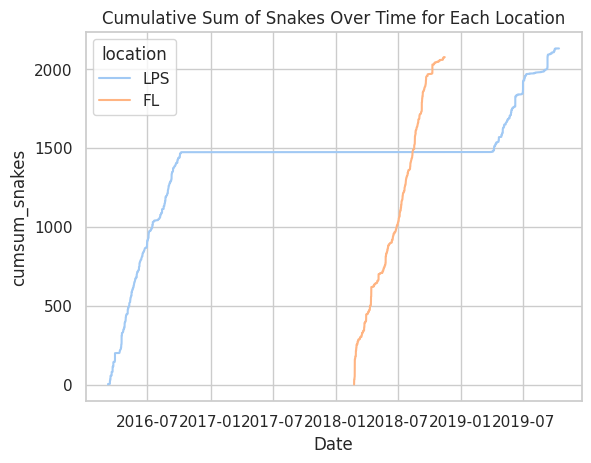

In [21]:
#create plot of snakes over time
sns.set_theme(style="whitegrid", palette="pastel")
time_plot = sns.lineplot(
    data=df,
    x="Date",
    y="cumsum_snakes",
    hue = "location",
).set(title = "Cumulative Sum of Snakes Over Time for Each Location")


[Text(0.5, 1.0, 'Cumulative Sum of Snakes Over Time')]

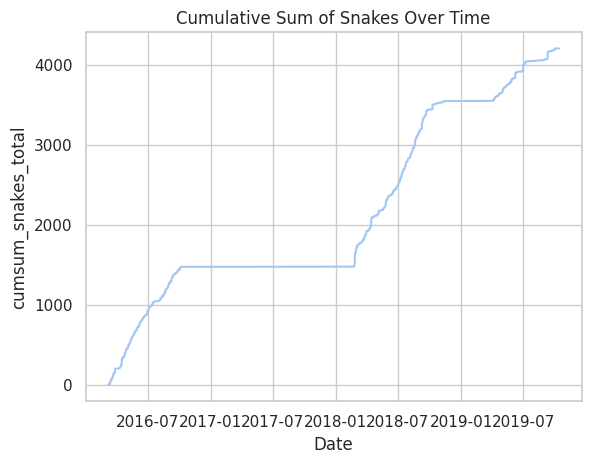

In [33]:
sns.set_theme(style="whitegrid", palette="pastel")
total_time_plot = sns.lineplot(
    data=df,
    x="Date", y="cumsum_snakes_total"
).set(title = "Cumulative Sum of Snakes Over Time")

total_time_plot

In [30]:
# cant save, manually save image

AttributeError: ignored

In [ ]:
# extract csv
path = '/content/drive/Shareddrives/Capstone 2023/Data/Time_Data/cumulative_organized_Data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)